<font color=blue><h1 style='text-align:center;'>Python Programming<br></h1>
<h2 style='text-align:center;'><font color=black>Class:AML 1214<br></font></h2><br> 
<h3 style='text-align: left;'><font color=blue>Term Project: Twitter Sentiment Analysis</font><br><font color=black>Submitted by:<br>1. Mohammed Omer Shaik<br>2. Sahaj<br>3. Sandra Nicholas<br>4. Varsha Agarwal<br>5. Vineet Sagar<br></font></h3>
<h4><font color=red> Twitter Data: Extracted using Twitter API V2 </font></h4>

<div class="alert alert-block alert-info"><h2><font color=Black>Installing TweePy and TextBlob</font></h2></div>

In [1]:
#Installing TextBlob Library.
pip install textblob

In [2]:
#Installing TweePY Library.
pip install tweepy --upgrade

<div class="alert alert-block alert-info"><h2><font color=Black>Data Extraction</font></h2></div>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
import re
from collections import Counter

<h2><font color='blue'> Reading the Credentials 

In [4]:
# Calling the Twitter Logic Credential Details
df_key=pd.read_excel("C:/Users/vinee/OneDrive/Desktop/Key.xlsx")

In [5]:
# Assigning the essential key values
access_token= df_key['pw'][3]
access_token_secret= df_key['pw'][4]
consumer_key= df_key['pw'][5]
consumer_secret= df_key['pw'][6]
Bearer_Token=df_key['pw'][2]

In [6]:
# Calling the Twitter client
client = tweepy.Client(bearer_token=Bearer_Token)

<h2><font color='blue'> Extracting Tweets using API

In [7]:
# Replace with your own search query
query = input("Enter the Keywords related to serach topic:")
# query = 'Twitter, Elon Musk, Poison Pill'

tweets=tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at','lang','possibly_sensitive'], 
                        max_results=100).flatten(limit=100)
i=1
data = []
lang=[]
sens=[]
for tweet in tweets:
    print(str(i)+') '+tweet.text)
    data.append([tweet.text])
    lang.append([tweet.lang])
    sens.append([tweet.possibly_sensitive])
    i=i+1

df = pd.DataFrame(data, columns=['Tweet'])
df['Language'] = pd.DataFrame(lang, columns=['Language'])
df['Sensitivity']= pd.DataFrame(sens, columns=['Sensitivity'])

Enter the Keywords related to serach topic:LIC IPO
1) Government Seeks Rs 30,000 Crore From LIC IPO, Half Of Earlier Estimate: Report https://t.co/tesCDv6PSK
2) RT @IndianExpress: ‘LIC valuation down by half ahead of IPO’

https://t.co/09zMl06Olt
3) Government Seeks Rs 30,000 Crore From LIC IPO, Half Of Earlier Estimate: Report https://t.co/tVh6t7TE0S
4) Government Seeks Rs 30,000 Crore From LIC IPO, Half Of Earlier Estimate: Report https://t.co/huyHC6SBy3
5) ‘LIC valuation down by half ahead of IPO’

https://t.co/09zMl06Olt
6) Government Seeks Rs 30,000 Crore From LIC IPO, Half Of Earlier Estimate: Report https://t.co/jZZKMMoZGE
7) 🟥 #LIC IPO: LIC valuation down by half ahead of initial public offer
8) LIC IPO: LIC valuation down by half ahead of initial public offer https://t.co/yuyR3DuJge
9) #RaviVisvesvarayaSharadaPrasad  https://t.co/LWH1zIBNrj  LIC IPO: LIC valuation down by half ahead of initial public offer
10) LIC IPO: LIC valuation down by half ahead of initial public offer h

In [8]:
# Reviewing the heads of the main Data
df.head(10)

,Tweet,Language,Sensitivity
0,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
1,RT @IndianExpress: ‘LIC valuation down by half...,en,False
2,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
3,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
4,‘LIC valuation down by half ahead of IPO’\n\nh...,en,False
5,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
6,🟥 #LIC IPO: LIC valuation down by half ahead o...,en,False
7,LIC IPO: LIC valuation down by half ahead of i...,en,False
8,#RaviVisvesvarayaSharadaPrasad https://t.co/L...,en,False
9,LIC IPO: LIC valuation down by half ahead of i...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Data Cleaning</font></h2></div>

In [9]:
# Retaining only Enlish Tweets from Twitter Data.
df_english= df[df.Language =="en"]

In [10]:
# Reviewing the Englist Tweets.
df_english.head(10)

,Tweet,Language,Sensitivity
0,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
1,RT @IndianExpress: ‘LIC valuation down by half...,en,False
2,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
3,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
4,‘LIC valuation down by half ahead of IPO’\n\nh...,en,False
5,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
6,🟥 #LIC IPO: LIC valuation down by half ahead o...,en,False
7,LIC IPO: LIC valuation down by half ahead of i...,en,False
8,#RaviVisvesvarayaSharadaPrasad https://t.co/L...,en,False
9,LIC IPO: LIC valuation down by half ahead of i...,en,False


<h2><font color='blue'> Note: The Tweet on Twitter are available in all languages. We will only Review Tweets in English.

In [11]:
# Removing all the Duplicates from the English Tweets.
df_unique=df_english.drop_duplicates(subset=['Tweet'], keep='first')

In [12]:
df_unique.reset_index(drop=True,inplace=True)

In [13]:
# Reviewing the Unique Englist Tweets.
df_unique.head(10)

,Tweet,Language,Sensitivity
0,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
1,RT @IndianExpress: ‘LIC valuation down by half...,en,False
2,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
3,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
4,‘LIC valuation down by half ahead of IPO’\n\nh...,en,False
5,"Government Seeks Rs 30,000 Crore From LIC IPO,...",en,False
6,🟥 #LIC IPO: LIC valuation down by half ahead o...,en,False
7,LIC IPO: LIC valuation down by half ahead of i...,en,False
8,#RaviVisvesvarayaSharadaPrasad https://t.co/L...,en,False
9,LIC IPO: LIC valuation down by half ahead of i...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Regular Expressions</font></h2></div>

In [14]:
# Function to Clean the Tweets from Twitter using Regular Expression(re) Library.
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #To substitue the user names. 
    text=re.sub(r'#','',text)
    text=re.sub(r"\?",'',text)
    text=re.sub(r'!','',text)
    text=re.sub(r'amp','',text) # To substitute Ampersand
    text=re.sub(r'_','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'&',' and ',text)
    text=re.sub(r'RT','',text) # To substitute ReTweets
    text=re.sub(r'"','',text)
    text=re.sub(r"’",'',text)
    text=re.sub(r"‘",'',text)
    text=re.sub(r"'",'',text)
    text=re.sub(r",",'',text)
    text=re.sub(r'[A-Za-z0-9]{1}[.]+', '',text) # To substitute any texts followed by dots.
    text=re.sub(r'\s*RT\s*@[^:]*:.','',text) #To handle ReTweets.
    text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',text) # To substitute Links
    text=re.sub(r'https?\/\/\S+','',text) # To substitute Links
    text=re.sub(r'https//','',text) # To substitute Links

    return text
df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/1801041844.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)


In [15]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,Government Seeks Rs 30000 Crore From LIC IPO H...,en,False
1,LIC valuation down by half ahead of IPO,en,False
2,Government Seeks Rs 30000 Crore From LIC IPO H...,en,False
3,Government Seeks Rs 30000 Crore From LIC IPO H...,en,False
4,LIC valuation down by half ahead of IPO,en,False
5,Government Seeks Rs 30000 Crore From LIC IPO H...,en,False
6,🟥 LIC IPO LIC valuation down by half ahead of ...,en,False
7,LIC IPO LIC valuation down by half ahead of in...,en,False
8,RaviVisvesvarayaSharadaPrasad LIC IPO LIC v...,en,False
9,LIC IPO LIC valuation down by half ahead of in...,en,False


In [16]:
# Converting all words into to lower case.
df_unique['Tweet']=df_unique['Tweet'].str.lower()

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/3774127502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].str.lower()


In [17]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,government seeks rs 30000 crore from lic ipo h...,en,False
1,lic valuation down by half ahead of ipo,en,False
2,government seeks rs 30000 crore from lic ipo h...,en,False
3,government seeks rs 30000 crore from lic ipo h...,en,False
4,lic valuation down by half ahead of ipo,en,False
5,government seeks rs 30000 crore from lic ipo h...,en,False
6,🟥 lic ipo lic valuation down by half ahead of ...,en,False
7,lic ipo lic valuation down by half ahead of in...,en,False
8,ravivisvesvarayasharadaprasad lic ipo lic v...,en,False
9,lic ipo lic valuation down by half ahead of in...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Word List</font></h2></div>

In [18]:
# Creating a dataframe to create the Word List. Dropping variables Sensitivity and Language
df_word1=df_unique.drop(columns =['Sensitivity', 'Language'])

In [19]:
# Converting the dataframe word1 to list.
word_list1=df_word1.values.tolist()

In [20]:
# Printing the word list 1
word_list1

[['government seeks rs 30000 crore from lic ipo half of earlier estimate\xa0report '],
 ['  lic valuation down by half ahead of ipo'],
 ['government seeks rs 30000 crore from lic ipo half of earlier estimate\xa0report '],
 ['government seeks rs 30000 crore from lic ipo half of earlier estimate\xa0report '],
 ['lic valuation down by half ahead of ipo'],
 ['government seeks rs 30000 crore from lic ipo half of earlier estimate\xa0report '],
 ['🟥 lic ipo lic valuation down by half ahead of initial public offer'],
 ['lic ipo lic valuation down by half ahead of initial public\xa0offer '],
 ['ravivisvesvarayasharadaprasad    lic ipo lic valuation down by half ahead of initial public offer'],
 ['lic ipo lic valuation down by half ahead of initial public\xa0offer '],
 ['spiking 🚀 todays ipos➡22 april 2022  india seeks $9 bln from lic ipo half of earlier estimateto learn more visit '],
 ['spiking 🚀 todays ipos➡22 april 2022  india seeks $9 bln from lic ipo half of earlier estimateto learn more v

<h2><font color='blue'>Note: The Tweets have been stored in form of Nested List. Each Inner List represents a Tweet. In order to make a Word count of most popular Keywords in Tweets, we need to perform following steps: </font></h2>

* <h2>Convert the Tweet String to Words
* <h2>Move the Words from Inner List to Main List.

In [21]:
# Converting Tweets String to Words to analyze the top words related to search topic.
flat_list = [] # creating an empty list to store words from tweets.
str1=""  # Creating an empty string
for sublist in word_list1:
    for item in sublist:
        str1=item
        str2=str1.split(" ") # Splitting the String to Words
        flat_list.append(str2) # Appending the created words to a list
        str1=""

In [22]:
# Reviewing the Words created in Inner List.
flat_list

[['government',
  'seeks',
  'rs',
  '30000',
  'crore',
  'from',
  'lic',
  'ipo',
  'half',
  'of',
  'earlier',
  'estimate\xa0report',
  ''],
 ['', '', 'lic', 'valuation', 'down', 'by', 'half', 'ahead', 'of', 'ipo'],
 ['government',
  'seeks',
  'rs',
  '30000',
  'crore',
  'from',
  'lic',
  'ipo',
  'half',
  'of',
  'earlier',
  'estimate\xa0report',
  ''],
 ['government',
  'seeks',
  'rs',
  '30000',
  'crore',
  'from',
  'lic',
  'ipo',
  'half',
  'of',
  'earlier',
  'estimate\xa0report',
  ''],
 ['lic', 'valuation', 'down', 'by', 'half', 'ahead', 'of', 'ipo'],
 ['government',
  'seeks',
  'rs',
  '30000',
  'crore',
  'from',
  'lic',
  'ipo',
  'half',
  'of',
  'earlier',
  'estimate\xa0report',
  ''],
 ['🟥',
  'lic',
  'ipo',
  'lic',
  'valuation',
  'down',
  'by',
  'half',
  'ahead',
  'of',
  'initial',
  'public',
  'offer'],
 ['lic',
  'ipo',
  'lic',
  'valuation',
  'down',
  'by',
  'half',
  'ahead',
  'of',
  'initial',
  'public\xa0offer',
  ''],
 ['ravi

In [23]:
# Moving the Tweet Words from inner list to main list to make count of main Words.
flat_list_main=[]
for sublist in flat_list:
    for item in sublist:
        flat_list_main.append(item)

In [24]:
# Reviewing the Final Word List created. 
flat_list_main

['government',
 'seeks',
 'rs',
 '30000',
 'crore',
 'from',
 'lic',
 'ipo',
 'half',
 'of',
 'earlier',
 'estimate\xa0report',
 '',
 '',
 '',
 'lic',
 'valuation',
 'down',
 'by',
 'half',
 'ahead',
 'of',
 'ipo',
 'government',
 'seeks',
 'rs',
 '30000',
 'crore',
 'from',
 'lic',
 'ipo',
 'half',
 'of',
 'earlier',
 'estimate\xa0report',
 '',
 'government',
 'seeks',
 'rs',
 '30000',
 'crore',
 'from',
 'lic',
 'ipo',
 'half',
 'of',
 'earlier',
 'estimate\xa0report',
 '',
 'lic',
 'valuation',
 'down',
 'by',
 'half',
 'ahead',
 'of',
 'ipo',
 'government',
 'seeks',
 'rs',
 '30000',
 'crore',
 'from',
 'lic',
 'ipo',
 'half',
 'of',
 'earlier',
 'estimate\xa0report',
 '',
 '🟥',
 'lic',
 'ipo',
 'lic',
 'valuation',
 'down',
 'by',
 'half',
 'ahead',
 'of',
 'initial',
 'public',
 'offer',
 'lic',
 'ipo',
 'lic',
 'valuation',
 'down',
 'by',
 'half',
 'ahead',
 'of',
 'initial',
 'public\xa0offer',
 '',
 'ravivisvesvarayasharadaprasad',
 '',
 '',
 '',
 'lic',
 'ipo',
 'lic',
 'val

In [25]:
# Making a count of the words created in the main list.
c=Counter(flat_list_main)

# Creating dataframe with list of words and count
df_list = pd.DataFrame.from_records(list(dict(c).items()), columns=['WordList','Count'])

In [26]:
# Printing the Word List dataset.
df_list

,WordList,Count
0,government,14
1,seeks,8
2,rs,17
3,30000,8
4,crore,11
...,...,...
435,development,1
436,rights,1
437,essential,1
438,grant,1


In [27]:
# Removing the extra spaces from the conversion and cleaning the text.
df_list['WordList']=df_list['WordList'].str.strip()

In [28]:
# Creating the variable Length to capture the length of the words in List.
df_list['Length']=df_list['WordList'].str.len()

In [29]:
# Reviewing the list of observation which are empty due to Data Cleaning action.
df_list[df_list['Length']==0].value_counts()

WordList  Count  Length
          69     0         1
dtype: int64

In [30]:
# Reviewing the Shape of Word List.
df_list.shape

(440, 3)

In [31]:
# Removing the blank observations.
df_list = df_list[df_list.Length != 0]

In [32]:
# Reviewing the Shape of Word List after removing the blank observation.
df_list.shape

(439, 3)

<h2><font color='blue'>Note: We observed the Word List have word which are Article, Pronouns etc. We need to remove them from our Word List.

In [33]:
# Removing the Article and Pronous from Word List.
Exclusions=["ourselves","hers","between","yourself","but","again","there","about","once","during","out","very","having","with","they",
"own","an","be","some","for","do","its","yours","such","into","of","most","itself","other","off","is","s","am","or","who",
"as","from","him","each","the","themselves","until","below","are","we","these","your","his","through","don","nor","me","were",
"her","more","himself","this","down","should","our","their","while","above","both","up","to","ours","had","she","all","no","when",
"at","any","before","them","same","and","been","have","in","will","on","does","yourselves","then","that","because","what","over",
"why","so","can","did","not","now","under","he","you","herself","has","just","where","too","only","myself","which","those","i",
"after","few","whom","t","being","if","theirs","my","against","a","by","doing","it","how","further","was","here","than","taking",
"without","much","many","more","whole","want","doesn’t","doesnt","isn’t","isnt","take","took","since","would","put","thats","that's","say"
"says" ]

# Iterating df_list over Exclusion List to remove Exclusion Words.
for i in Exclusions:
    for j in range(len(df_list)):
        val = df_list.iloc[j,0]
        if val == i:
            df_list['WordList'] = df_list['WordList'].replace(val," ")

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/2381809638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['WordList'] = df_list['WordList'].replace(val," ")


In [34]:
# Re-calculate the length of the words in Word List.
df_list['Length']=df_list['WordList'].str.len()

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/3810608361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['Length']=df_list['WordList'].str.len()


In [35]:
# Taking count of all the blank and unnecessary single alphabets from data
df_list[df_list['Length']==1].value_counts()

WordList  Count  Length
          1      1         23
          2      1         12
          3      1         10
          4      1          4
          6      1          4
          11     1          3
          8      1          2
          12     1          2
|         4      1          1
c         1      1          1
d         1      1          1
…         1      1          1
–         1      1          1
6         2      1          1
👇         1      1          1
🚀         2      1          1
;         5      1          1
          43     1          1
5         1      1          1
2         1      1          1
-         1      1          1
          41     1          1
          29     1          1
          13     1          1
          10     1          1
          7      1          1
          5      1          1
🟥         1      1          1
dtype: int64

In [36]:
# Removing all blank and unnecessary single alphabets from data
df_list = df_list[df_list.Length != 1]

In [37]:
# Word list after all cleaning.
df_list

,WordList,Count,Length
0,government,14,10
1,seeks,8,5
2,rs,17,2
3,30000,8,5
4,crore,11,5
...,...,...,...
435,development,1,11
436,rights,1,6
437,essential,1,9
438,grant,1,5


In [38]:
# Creating sorted count list to get Top 20 words from Word List.  
df_top=df_list.sort_values(by=['Count'],ascending=False)

In [39]:
# Printing the Sorted List
df_top

,WordList,Count,Length
7,ipo,54,3
6,lic,52,3
2,rs,17,2
0,government,14,10
8,half,14,4
...,...,...,...
227,position…savemytweet,1,20
228,cutting,1,7
231,answer,1,6
232,key,1,3


In [40]:
# Keeping only Top 20 words.
df_top20=df_top[:20]

In [41]:
# Printing the Top 20 words 
df_top20

,WordList,Count,Length
7,ipo,54,3
6,lic,52,3
2,rs,17,2
0,government,14,10
8,half,14,4
93,market,14,6
105,size,12,4
4,crore,11,5
13,valuation,9,9
29,india,8,5


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Top 20 words'}, xlabel='WordList', ylabel='Count'>

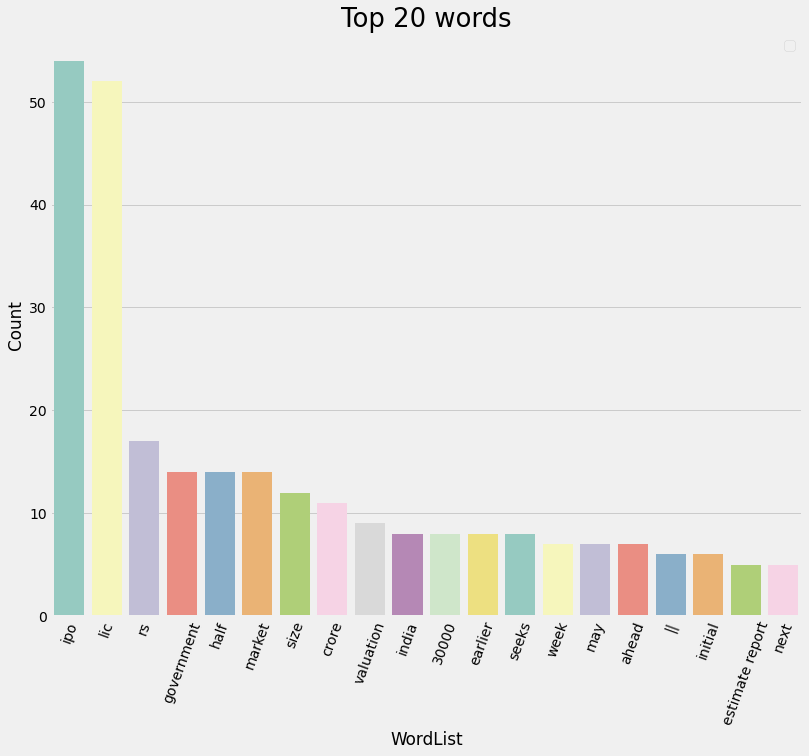

In [51]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=70)
plt.rcParams.update({'font.size': 18})
plt.legend(fontsize = 14)
plt.title("Top 20 words")
sns.barplot(x='WordList',y='Count',data=df_top20,palette = 'Set3')

<div class="alert alert-block alert-info"><h2><font color=Black>Sentiment Analysis</font></h2></div>

In [43]:
# Performing Sentiment Analysis

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)

df_unique.head(10)

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/2062348916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/2062348916.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)


,Tweet,Language,Sensitivity,Subjectivity,Polarity
0,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333
1,lic valuation down by half ahead of ipo,en,False,0.227778,-0.161111
2,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333
3,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333
4,lic valuation down by half ahead of ipo,en,False,0.227778,-0.161111
5,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333
6,🟥 lic ipo lic valuation down by half ahead of ...,en,False,0.130556,-0.080556
7,lic ipo lic valuation down by half ahead of in...,en,False,0.130556,-0.080556
8,ravivisvesvarayasharadaprasad lic ipo lic v...,en,False,0.130556,-0.080556
9,lic ipo lic valuation down by half ahead of in...,en,False,0.130556,-0.080556


In [44]:
# Classifying the Polarity into Negative, Neutral and Positive.
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)

df_unique.head(10)

C:\Users\vinee\AppData\Local\Temp/ipykernel_19540/2767359763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)


,Tweet,Language,Sensitivity,Subjectivity,Polarity,Analysis
0,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333,Negative
1,lic valuation down by half ahead of ipo,en,False,0.227778,-0.161111,Negative
2,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333,Negative
3,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333,Negative
4,lic valuation down by half ahead of ipo,en,False,0.227778,-0.161111,Negative
5,government seeks rs 30000 crore from lic ipo h...,en,False,0.333333,-0.083333,Negative
6,🟥 lic ipo lic valuation down by half ahead of ...,en,False,0.130556,-0.080556,Negative
7,lic ipo lic valuation down by half ahead of in...,en,False,0.130556,-0.080556,Negative
8,ravivisvesvarayasharadaprasad lic ipo lic v...,en,False,0.130556,-0.080556,Negative
9,lic ipo lic valuation down by half ahead of in...,en,False,0.130556,-0.080556,Negative


In [45]:
# Create a dataframe to capture count of Positive, Neutral and Negative.
df_sens = df_unique['Analysis'].value_counts().rename_axis('Analysis').reset_index(name='Counts')

In [46]:
# Sorting the values to print Positive, Neutral and Negative.
df_sens=df_sens.sort_values(by=['Analysis'],ascending=False)

In [47]:
# Print the Dataset with count
df_sens

,Analysis,Counts
2,Positive,15
1,Neutral,19
0,Negative,21


<AxesSubplot:title={'center':'Polarity Graph'}, xlabel='Analysis', ylabel='Counts'>

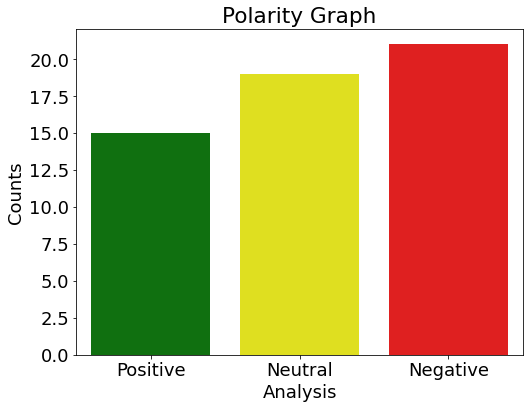

In [48]:
# Plotting Barplot of Positive, Neutral and Negative Counts.
plt.figure(figsize=(8,6))
plt.title("Polarity Graph")
colors = ['green', 'yellow', 'red']
sns.barplot(x="Analysis",y="Counts",data=df_sens,palette =colors)

In [49]:
# Reviewing unique values of Polarity.
df_unique['Polarity'].unique()

array([-0.08333333, -0.16111111, -0.08055556,  0.11111111,  0.        ,
       -0.05555556, -0.2       ,  0.08333333,  0.31818182,  0.25      ,
        0.1       ,  0.2       , -0.125     , -0.1875    , -0.13333333,
       -0.4       ,  0.12071429,  0.5       ,  0.00208333, -0.02583333,
        0.11111111, -0.00416667,  0.7       ])

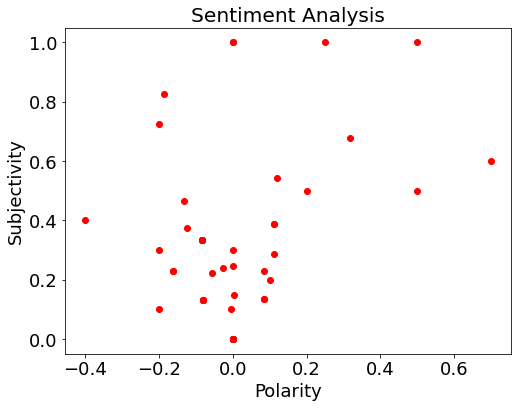

In [50]:
# Plotting Sentiment Analysis Graph of Subjectivity and Polarity. 
plt.figure(figsize=(8,6))
plt.scatter(df_unique['Polarity'],df_unique['Subjectivity'],color='red')
plt.style.use('fivethirtyeight')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()